In [1]:
# stazeni dat z Hipparcos
from astroquery.vizier import Vizier
from astropy.coordinates import Angle
result = Vizier(row_limit=99999,
                columns=['_RAJ2000','_DEJ2000','Vmag'],
                catalog='Hipparcos',
                column_filters={"Vmag":"<5.0"}).query_constraints(Vmag="-99..5")

In [2]:
hip = result['I/239/hip_main']
ra = hip['_RAJ2000']
dec = hip['_DEJ2000']
mag = hip['Vmag']
f = 10**(0.2*(5 - mag))

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np
rad = 180 / np.pi

In [5]:
# Hammer - Aitoff projection
gamma = rad * np.sqrt(2/(1 + np.cos(dec/rad)*np.cos(((180-ra)/2)/rad)))
x = 2*gamma*np.cos(dec/rad)*np.sin(((180-ra)/2)/rad)
y = gamma*np.sin(dec/rad)

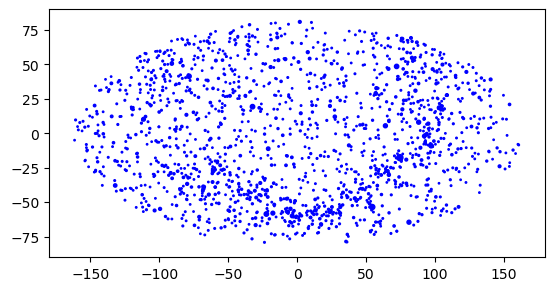

In [6]:
fig, axes = plt.subplots(1)
axes.set_xlim(-180,180)
axes.set_ylim(-90,90)
axes.set_aspect('equal')
plt.scatter(x,y,s=f,color='blue')
plt.show()

In [7]:
den = []
mrs_ra = []
mrs_dec = []
mark=False
with open('mars_horizons_results.txt', 'r') as hr:
    for line in hr:
        #print(line)

        if line[0:5] == "$$EOE":
            mark = False

        if mark:
            #print(line[0:12],line[23:32],line[33:42])
            den.append(int(line[10:12]))
            mrs_ra.append(float(line[23:32]))
            mrs_dec.append(float(line[33:42]))

        if line[0:5] == "$$SOE":
            mark = True

mars_ra = np.array(mrs_ra)            
mars_dec = np.array(mrs_dec) 

In [8]:
# Hammer - Aitoff projection
gamma = rad * np.sqrt(2/(1 + np.cos(mars_dec/rad)*np.cos(((180-mars_ra)/2)/rad)))
xmars = 2*gamma*np.cos(mars_dec/rad)*np.sin(((180-mars_ra)/2)/rad)
ymars = gamma*np.sin(mars_dec/rad)

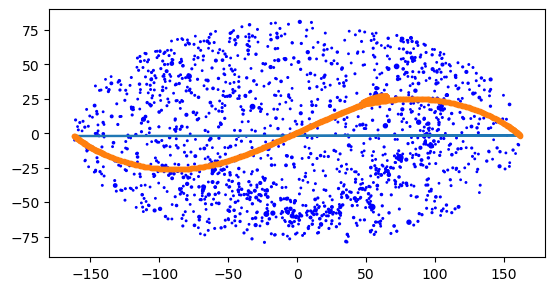

In [9]:
fig, axes = plt.subplots(1)
axes.set_xlim(-180,180)
axes.set_ylim(-90,90)
axes.set_aspect('equal')
plt.scatter(x,y,s=f,color='blue')
plt.plot(xmars,ymars)
plt.plot(xmars,ymars,'.')
plt.show()

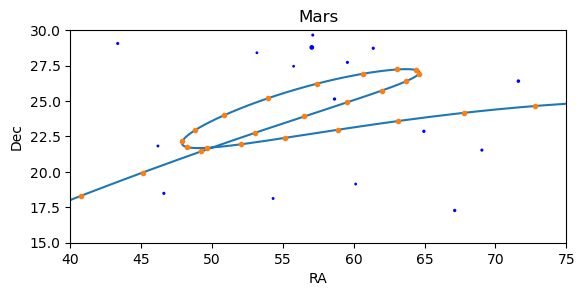

In [10]:
fig, axes = plt.subplots(1)
axes.set_xlim(40,75)
axes.set_ylim(15,30)
axes.set_aspect('equal')
plt.scatter(x,y,s=f,color='blue')
plt.plot(xmars,ymars)
plt.plot(xmars[::10],ymars[::10],'.')
plt.title("Mars")
plt.xlabel("RA")
plt.ylabel("Dec")
plt.show()